# First neuron and functions

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.metrics import accuracy_score

dimension de X :  (100, 2)
dimension de y :  (100, 1)


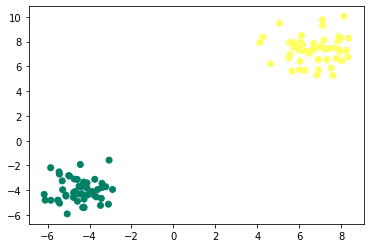

In [2]:
X, y = make_blobs(n_samples=100, n_features=2, centers=2)
y = y.reshape((y.shape[0], 1 ))

print('dimension de X : ', X.shape)
print('dimension de y : ', y.shape)

plt.scatter(X[:,0], X[:,1], c=y, cmap='summer')
plt.show()

In [3]:
def initialisation(X):
    W = np.random.randn(X.shape[1], 1)
    b = np.random.randn(1)
    return(W, b)

In [4]:
def model(X, W, b):
    Z = X.dot(W) + b
    A = 1 / (1 + np.exp(-Z))
    return A

To avoid a problem with log(0), we use epsilon that is 1e-15

In [5]:
def log_loss(A, y):
    return -1 / len(y) * np.sum(y * np.log(A) + (1 - y) * np.log(1 - A))
    

In [6]:
def gradients(A, X, y):
    dW = 1 / len(y) * np.dot(X.T, A - y)
    db = 1 / len(y) * np.sum(A - y)
    return dW, db

In [7]:
def predict(X, W, b):
    A = model(X, W, b)
    return A>= 0.5

In [8]:
def update(dW, db, W, b, learning_rate):
    W = W - learning_rate * dW
    b = b - learning_rate * db
    return(W, b)

In [9]:
def neuron(X, y, learning_rate = 0.1 , iter = 100):
    W, b = initialisation(X)
    
    loss = []
    accuracy = []
    
    for i in range(iter):
        A = model(X, W, b)
        
        loss.append(log_loss(A, y))
        
        y_predictions = predict(X, W, b)
        accuracy.append(accuracy_score(y, y_predictions))
        
        dW, db = gradients(A, X, y)
        W, b = update(dW, db, W, b, learning_rate)
        
    plt.figure(figsize=(12,4))
    plt.subplot(1, 2, 1)
    plt.plot(loss)
    plt.subplot(1, 2, 2)
    plt.plot(accuracy)
    plt.show()
    
    print('accuracy : ' ,accuracy_score(y, y_predictions)*100, '%')
    
    return(W, b)

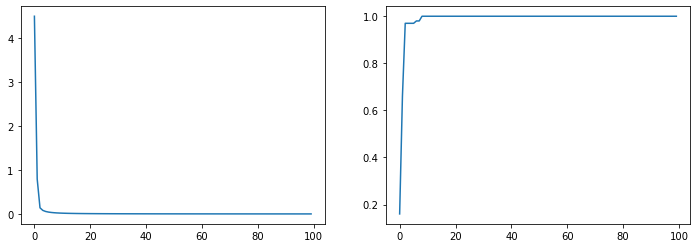

accuracy :  100.0 %


In [10]:
W, b = neuron(X, y)

# Test with photo recognition

## Dataset

In [11]:
!pip install h5py
from utilities import *

In [12]:
x_train, y_train, x_test, y_test = load_data()

In [13]:
print(x_train.shape)
print(y_train.shape)
print(np.unique(y_train, return_counts=True))

(1000, 64, 64)
(1000, 1)
(array([0., 1.]), array([500, 500], dtype=int64))


In [14]:
print(x_test.shape)
print(y_test.shape)
print(np.unique(y_test, return_counts=True))

(200, 64, 64)
(200, 1)
(array([0., 1.]), array([100, 100], dtype=int64))


In [15]:
def log_loss_2(A, y):
    epsilon = 1e-15
    return -1 / len(y) * np.sum(y * np.log(A + epsilon) + (1 - y) * np.log(1 - A + epsilon))

In [16]:
!pip install jupyterplot
from jupyterplot import ProgressPlot

In [17]:
def neuron_2(X, y, learning_rate = 0.015 , iter = 0, limit_iter = 0):
    pp = ProgressPlot(plot_names=["loss", "accuracy"])
    
    # Initialisation
    W, b = initialisation(X)
    loss = []
    accuracy = []
    activateur = 0
    
    # Learning loop
    while activateur == 0 :
        A = model(X, W, b)
        
        
        # Loss calculation
        loss.append(log_loss_2(A, y))
        
        # Accuracy calculation 
        y_predictions = predict(X, W, b)
        accuracy.append(accuracy_score(y, y_predictions))
        
        # Update
        dW, db = gradients(A, X, y)
        W, b = update(dW, db, W, b, learning_rate)
        
        if accuracy[iter] > 0.95 or iter > limit_iter:
            activateur = 1
        
        pp.update([[loss[iter]],[accuracy_score(y, y_predictions)]])
       
        iter = iter + 1
        
        
   
    
    acc = accuracy_score(y, y_predictions)
    pp.finalize()
    print('accuracy : ' ,acc*100, '%\n iterations :', iter)
    
    return(W, b)

In [18]:
def neuron_test(X, y, learning_rate = 0.01 , iter = 150):
    W, b = initialisation(X)
    
    loss = []
    accuracy = []
    
    for i in range(iter):
        A = model(X, W, b)
        
        loss.append(log_loss_2(A, y))
        
        y_predictions = predict(X, W, b)
        accuracy.append(accuracy_score(y, y_predictions))
        
        dW, db = gradients(A, X, y)
        W, b = update(dW, db, W, b, learning_rate)
        
        
    plt.figure(figsize=(12,4))
    plt.subplot(1, 2, 1)
    plt.plot(loss)
    plt.subplot(1, 2, 2)
    plt.plot(accuracy)
    plt.show()
    
    acc = accuracy_score(y, y_predictions)
    
    print('accuracy : ' ,acc*100, '%')
    
    return(W, b)

## Training of the model

The function works with array of 2 dimensions but with the images, there is 3 dimensions : number of images, pixels on x, pixels on y (1000, 64, 64).
So we need to reshape our dataset to fit.

In [19]:
x_train_reshape = x_train.reshape(x_train.shape[0], -1)
x_train_reshape.shape

(1000, 4096)

In [20]:
x_test_reshape = x_test.reshape(x_test.shape[0], -1)
x_test_reshape.shape

(200, 4096)

C:\Users\ara\AppData\Local\Temp/ipykernel_10464/1615515945.py:3: RuntimeWarning: overflow encountered in exp
  A = 1 / (1 + np.exp(-Z))
C:\Users\ara\AppData\Local\Temp/ipykernel_10464/2985065044.py:2: RuntimeWarning: divide by zero encountered in log
  return -1 / len(y) * np.sum(y * np.log(A) + (1 - y) * np.log(1 - A))
C:\Users\ara\AppData\Local\Temp/ipykernel_10464/2985065044.py:2: RuntimeWarning: invalid value encountered in multiply
  return -1 / len(y) * np.sum(y * np.log(A) + (1 - y) * np.log(1 - A))
C:\Users\ara\AppData\Local\Temp/ipykernel_10464/2985065044.py:2: RuntimeWarning: divide by zero encountered in log
  return -1 / len(y) * np.sum(y * np.log(A) + (1 - y) * np.log(1 - A))
C:\Users\ara\AppData\Local\Temp/ipykernel_10464/2985065044.py:2: RuntimeWarning: invalid value encountered in multiply
  return -1 / len(y) * np.sum(y * np.log(A) + (1 - y) * np.log(1 - A))
C:\Users\ara\AppData\Local\Temp/ipykernel_10464/2985065044.py:2: RuntimeWarning: divide by zero encountered in l

C:\Users\ara\AppData\Local\Temp/ipykernel_10464/2985065044.py:2: RuntimeWarning: divide by zero encountered in log
  return -1 / len(y) * np.sum(y * np.log(A) + (1 - y) * np.log(1 - A))
C:\Users\ara\AppData\Local\Temp/ipykernel_10464/2985065044.py:2: RuntimeWarning: invalid value encountered in multiply
  return -1 / len(y) * np.sum(y * np.log(A) + (1 - y) * np.log(1 - A))
C:\Users\ara\AppData\Local\Temp/ipykernel_10464/2985065044.py:2: RuntimeWarning: divide by zero encountered in log
  return -1 / len(y) * np.sum(y * np.log(A) + (1 - y) * np.log(1 - A))
C:\Users\ara\AppData\Local\Temp/ipykernel_10464/2985065044.py:2: RuntimeWarning: invalid value encountered in multiply
  return -1 / len(y) * np.sum(y * np.log(A) + (1 - y) * np.log(1 - A))
C:\Users\ara\AppData\Local\Temp/ipykernel_10464/1615515945.py:3: RuntimeWarning: overflow encountered in exp
  A = 1 / (1 + np.exp(-Z))
C:\Users\ara\AppData\Local\Temp/ipykernel_10464/2985065044.py:2: RuntimeWarning: divide by zero encountered in l

C:\Users\ara\AppData\Local\Temp/ipykernel_10464/2985065044.py:2: RuntimeWarning: divide by zero encountered in log
  return -1 / len(y) * np.sum(y * np.log(A) + (1 - y) * np.log(1 - A))
C:\Users\ara\AppData\Local\Temp/ipykernel_10464/2985065044.py:2: RuntimeWarning: invalid value encountered in multiply
  return -1 / len(y) * np.sum(y * np.log(A) + (1 - y) * np.log(1 - A))
C:\Users\ara\AppData\Local\Temp/ipykernel_10464/2985065044.py:2: RuntimeWarning: divide by zero encountered in log
  return -1 / len(y) * np.sum(y * np.log(A) + (1 - y) * np.log(1 - A))
C:\Users\ara\AppData\Local\Temp/ipykernel_10464/2985065044.py:2: RuntimeWarning: invalid value encountered in multiply
  return -1 / len(y) * np.sum(y * np.log(A) + (1 - y) * np.log(1 - A))
C:\Users\ara\AppData\Local\Temp/ipykernel_10464/1615515945.py:3: RuntimeWarning: overflow encountered in exp
  A = 1 / (1 + np.exp(-Z))
C:\Users\ara\AppData\Local\Temp/ipykernel_10464/2985065044.py:2: RuntimeWarning: divide by zero encountered in l

C:\Users\ara\AppData\Local\Temp/ipykernel_10464/2985065044.py:2: RuntimeWarning: divide by zero encountered in log
  return -1 / len(y) * np.sum(y * np.log(A) + (1 - y) * np.log(1 - A))
C:\Users\ara\AppData\Local\Temp/ipykernel_10464/2985065044.py:2: RuntimeWarning: invalid value encountered in multiply
  return -1 / len(y) * np.sum(y * np.log(A) + (1 - y) * np.log(1 - A))
C:\Users\ara\AppData\Local\Temp/ipykernel_10464/2985065044.py:2: RuntimeWarning: divide by zero encountered in log
  return -1 / len(y) * np.sum(y * np.log(A) + (1 - y) * np.log(1 - A))
C:\Users\ara\AppData\Local\Temp/ipykernel_10464/2985065044.py:2: RuntimeWarning: invalid value encountered in multiply
  return -1 / len(y) * np.sum(y * np.log(A) + (1 - y) * np.log(1 - A))
C:\Users\ara\AppData\Local\Temp/ipykernel_10464/1615515945.py:3: RuntimeWarning: overflow encountered in exp
  A = 1 / (1 + np.exp(-Z))
C:\Users\ara\AppData\Local\Temp/ipykernel_10464/2985065044.py:2: RuntimeWarning: divide by zero encountered in l

C:\Users\ara\AppData\Local\Temp/ipykernel_10464/2985065044.py:2: RuntimeWarning: divide by zero encountered in log
  return -1 / len(y) * np.sum(y * np.log(A) + (1 - y) * np.log(1 - A))
C:\Users\ara\AppData\Local\Temp/ipykernel_10464/2985065044.py:2: RuntimeWarning: invalid value encountered in multiply
  return -1 / len(y) * np.sum(y * np.log(A) + (1 - y) * np.log(1 - A))
C:\Users\ara\AppData\Local\Temp/ipykernel_10464/2985065044.py:2: RuntimeWarning: divide by zero encountered in log
  return -1 / len(y) * np.sum(y * np.log(A) + (1 - y) * np.log(1 - A))
C:\Users\ara\AppData\Local\Temp/ipykernel_10464/2985065044.py:2: RuntimeWarning: invalid value encountered in multiply
  return -1 / len(y) * np.sum(y * np.log(A) + (1 - y) * np.log(1 - A))
C:\Users\ara\AppData\Local\Temp/ipykernel_10464/1615515945.py:3: RuntimeWarning: overflow encountered in exp
  A = 1 / (1 + np.exp(-Z))
C:\Users\ara\AppData\Local\Temp/ipykernel_10464/2985065044.py:2: RuntimeWarning: divide by zero encountered in l

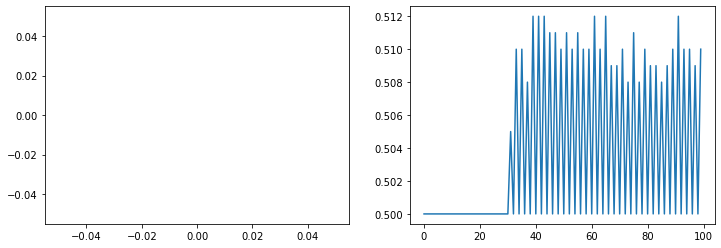

accuracy :  51.0 %


In [21]:
W, b = neuron(x_train_reshape, y_train)

As we can see, the cost function can't converge properly to a value because the variables are not normalised. And the log function causes an error


## MinMax normalisation

In [22]:
x_train_reshape = x_train.reshape(x_train.shape[0], -1) / x_train.max()
x_train_reshape.shape

(1000, 4096)

In [23]:
x_test_reshape = x_test.reshape(x_test.shape[0], -1) / x_train.max()
x_test_reshape.shape

(200, 4096)

In [24]:
W, b= neuron_2(x_train_reshape, y_train, learning_rate = 0.015, iter=0 ,limit_iter = 1000)

accuracy :  56.89999999999999 %
 iterations : 1002


## Comparison between the train set and the test set

To avoid some errors, I decided to delete the live plotting

In [25]:
from tqdm import tqdm

In [26]:
def neuron_3(X_train, y_train,X_test, y_test, learning_rate = 0.015 , iter = 0):
    
    # Initialisation
    W, b = initialisation(X_train)
    
    train_loss = []
    train_accuracy = []
    
    test_loss = []
    test_accuracy = []
    
    activateur = 0
    
    # Learning loop
    for i in tqdm(range(iter)):
        A = model(X_train, W, b)
        
        #Train
        # Loss calculation
        train_loss.append(log_loss_2(A, y_train))
        # Accuracy calculation 
        y_predictions = predict(X_train, W, b)
        train_accuracy.append(accuracy_score(y_train, y_predictions))
        
        #Test
        A_test = model(X_test, W, b)
        # Loss calculation
        test_loss.append(log_loss_2(A_test, y_test))
        # Accuracy calculation 
        y_predictions = predict(X_test, W, b)
        test_accuracy.append(accuracy_score(y_test, y_predictions))
        
        # Update
        dW, db = gradients(A, X_train, y_train)
        W, b = update(dW, db, W, b, learning_rate)
        
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(train_loss, label='train loss')
    plt.plot(test_loss, label='test loss')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(train_accuracy, label='train accuracy')
    plt.plot(test_accuracy, label='test accuracy')
    plt.legend()
    plt.show()
    
    return(W, b)

100%|██████████| 10000/10000 [00:59<00:00, 167.97it/s]


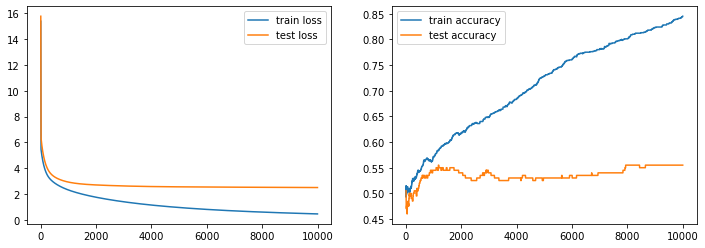

In [31]:
W, b = neuron_3(x_train_reshape, y_train, x_test_reshape, y_test, learning_rate=0.021, iter=10000)

The model is doing over-fitting. As we can see, the model do a lot of errors while using the test set and even with 1000 iterations, the model can't improve results. It shows that the model isn't able to generalize the results in test set.

To improve this model, we can add data, use a regularisation method or reduce the number of parameters but even with these modifications, the model is too simplistic because it's only one neuron able to do linear separation of data.

So before trying to solve the over-fitting issue, we have to add neurons to our model to obtain a neuron network.